In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
</style>


# Recursion (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda  

### Recursion


### Lecture reminder - the Matryoska doll problem

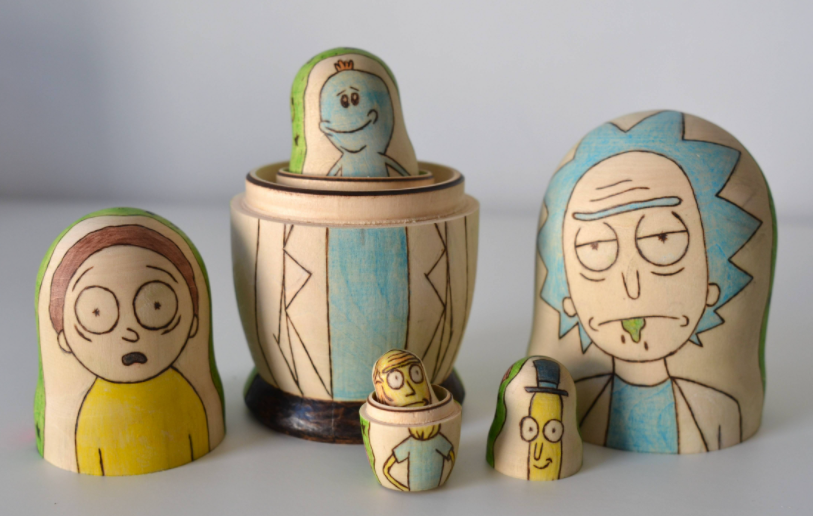


</br>

### Recursive Pseudo code
```python
def how many dolls(this_doll):
    if this_doll has no more dolls inside it:
        return 1
    else:
        answer = this doll + all dolls inside it
        return answer
```

### Lecture reminder - the recursive approach

|||
|:--|:--|
|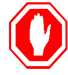|Base (termination) condition|
|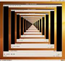|Decomposition to smaller instances|
|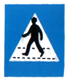|Use solutions of smaller instances to solve the original problem|

### Power Calculation

Natural power definition:
- $x^y = x \cdot x \cdot … \cdot x$ (y times)


#### How can we solve it using the recursive approach?

### Power Calculation - the recursive approach
#### Base case:
- $y=0 \Longrightarrow x^0=1$

#### Decomposition:
- Calculating $x^{y-1}$: the solution for a problem which is **one step closer** to the base case

#### Aggregation:
- Assuming we have the solution for $x^{y-1}$, we use it for our solution: $x^y = x \cdot x^{y-1}$
#### Or, <span style='color:green'> Mathematically </span>:
$x^y= 
\begin{cases}
1,& \text{if } y=0  \\
x\cdot x^{y-1},& \text{otherwise}
\end{cases}
$

###  Python recursive implementation

In [ ]:
def power(x, y): 
    if y == 0: 
        return 1 # STOP
    result = power(x,y-1) #DECOMPOSITION
    return x * result # AGGREGATION

In [ ]:
print(power(2,5))

In [ ]:
print(power(3,3))

### <u>Fast</u> Power Calculation

#### Natural power definition:

$x^y = x \cdot x \cdot … \cdot x$ (y times)


#### Fast Power Formula:
$x^y= 
\begin{cases}
1,& \text{if } y=0  \\
x\cdot x^{y-1},& \text{y is odd} \\
x^{y/2}\cdot x^{y/2},& \text{y is even}
\end{cases}
$

#### Why is it fast?
- Because it requires less calculations

### Example #1: $2^{17}$

- ```power(2,17)``` requires **17 extra** function calls:
    - ```power(2,16)```
    - ```power(2,15)```
    - ...
    - ```power(2,0)```
        
- ```fast_power(2, 17)``` requires **only 6**:
    - ```fast_power(2,16)```
    - ```fast_power(2,8)```
    - ```fast_power(2,4)```
    - ```fast_power(2,2)```
    - ```fast_power(2,1)```
    - ```fast_power(2,0)```

### Example #2: $0.5^{30}$

- ```power(0.5,30)``` requires **30 extra** function calls:
    - ```power(0.5,29)``` → ```power(0.5,28)``` → ... → ```power(0.5,0)```
        
- ```fast_power(0.5,30)``` requires **only 9**:
    - ```fast_power(0.5,30)```
    - ```fast_power(0.5,15)```
    - ```fast_power(0.5,14)```
    - ```fast_power(0.5,7)```
    - ```fast_power(0.5,6)```
    - ```fast_power(0.5,3)```
    - ```fast_power(0.5,2)```
    - ```fast_power(0.5,1)```
    - ```fast_power(0.5,0)```

- How fast is fast calculation? What is the relation between the power and the number of multiplications?

### Fast power - python recursive implementation

In [ ]:
def fast_power(x, y): 
    print('fast_power(' + str(x) + ',' + str(y) + ')-->', end=' ')
    if y == 0:
        return 1 
    if y%2 == 0:     # even power 
        tmp = fast_power(x, y // 2) 
        return tmp*tmp   
    return x * fast_power(x, y - 1) # odd power 

In [ ]:
print(fast_power(2,5))

In [ ]:
print(fast_power(0.5,17))

###  Let's draw together the recursion tree (Try also with [this tool](https://recursion.vercel.app/))

### ${n \choose k}$ - Choose k elements from n 

How many different ways to choose **k** volunteers out of **n** students? 

### For example:

If we have <span style='color:blue'> **four** </span> students: (Hagai, Shimon, Omer, Shahar), and we need only <span style='color:blue'> **one** </span> volunteer, we can assemble 4 different groups of 1 volunteer:
- (Hagai), (Shimon), (Omer), (Shahar)
- ${4 \choose 1}=4$

If we have <span style='color:blue'> **four** </span> students: (Hagai, Shimon, Omer, Shahar), and we need <span style='color:blue'> **two** </span> volunteers, we can assemble 6 different groups of 2 volunteers:
- (Hagai, Shimon), (Hagai, Omer), (Hagai, Shahar), (Shimon, Omer), (Shimon, Shahar), (Omer, Shahar)
- ${4 \choose 2}=6$

### n choose k: the recursive approach

- We fill up our k-size volunteer group with students.
- Base case (Stop criteria):
    - k == 0  $\rightarrow$ return 1
        - Can only be one voluinteer group of size 0 - the empty group
	- k == n  $\rightarrow$ return 1
        - Can only be one volunteer group of size k - the group of all students
	- n  <  k  $\rightarrow$ return 0
        - There are not enough students to volunteer



### n choose k: the recursive approach
- Decomposition:
    - We look at one student at the time, and consider two sets of possible volunteer groups:
        - groups **with** this student
            - where we have to choose k-1 more volunteers, from a group of n-1 students
            - ${n-1 \choose k-1}$
        - groups **without** this studen
            - where we have to choose k more volunteers, from a group of n-1 students
            - ${n-1 \choose k}$
    - Each of the above options, make the problem **one step** simpler. 
    
- Aggregation:
    - The above sets are **disjoint**, so we can sum up their results:
    - ${n \choose k}$=${n-1 \choose k-1}$+${n-1 \choose k}$

### n choose k: Python recursive implementation

In [ ]:
def choose(n, k):
    if k==0 or n==k: # STOP
        return 1 
    if n < k: # STOP
        return 0 
    return choose(n - 1, k - 1) + choose(n - 1, k) # DECOMPOSITION + AGGREGATION

In [ ]:
print(choose(4, 1))

In [ ]:
print(choose(4, 2))

In [ ]:
print(choose(20, 5))

## n choose k: recursion tree


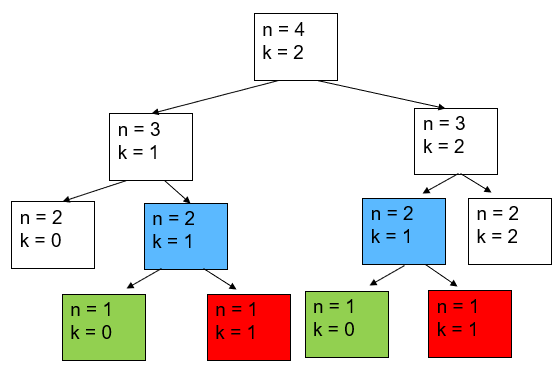

### String merge
- **Input:** strings *z,x,y*
- **Output:** is *z* a **merge** of *x* and *y*? 

Examples
<table><tr>
    <td>
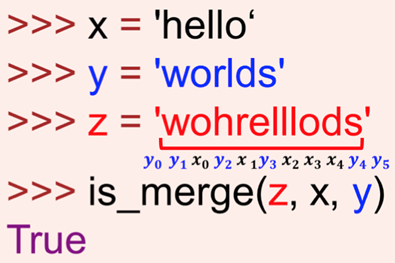
    </td>
    <td>
<ul>
<li>x = "<span style='color:blue'>eaai</span>"</li></li>
<li>y = "<span style='color:red'>gaad</span>"
<li>z = egaaaiad</li>
<br/>    
<ul>
<li> '<span style='color:blue'>e</span><span style='color:red'>g</span><span style='color:blue'>a<span style='color:red'>a</span><span style='color:blue'>ai</span><span style='color:red'>ad</span>'</li>
<li> '<span style='color:blue'>e</span><span style='color:red'>ga</span><span style='color:blue'>aai</span><span style='color:red'>ad</span>'</li>
</ul>
</ul>
</td>
</tr>
</table>

### `is_merge(𝒛,𝒙,𝒚)`  pseudo code:
- **Base:** 
    - If 𝑥 is empty, the answer is 𝑧==𝑦.
    - If y is empty, the answer is 𝑧==𝑥.
    - If 𝑥,𝑦 aren’t empty but 𝑧 is, the answer is False.
- **Decomposition:** For all other cases, if $z$ is a merge, its first character must be the first character of $x$ **or** the first character of $y$. So we compare and aggregate a **one step** simpler version:
```python 
    𝑧[0]==𝑥[0] 𝑎𝑛𝑑 𝑖𝑠_𝑚𝑒𝑟𝑔𝑒(𝑧[1:],𝑥[1:],𝑦) 
    𝑜𝑟 
    𝑧[0]==𝑦[0] 𝑎𝑛𝑑 𝑖𝑠_𝑚𝑒𝑟𝑔𝑒(𝑧[1:],𝑥,𝑦[1:])
```

### String merge - Python implenentation

In [ ]:
def is_merge(z, x, y):
    if len(x) == 0:            # STOP
        return z == y
    if len(y) == 0:            # STOP
        return z == x
    if len(z) == 0:            # STOP
        return False
    
    if z[0] == x[0] and is_merge(z[1:], x[1:], y): # DECOMPOSITION + USE
        return True
    if z[0] == y[0] and is_merge(z[1:], x, y[1:]): # DECOMPOSITION + USE
        return True
    
    return False

In [ ]:
x, y, z = "rrkrrrk", "rrrkrrkr", "rrrkrrrkrrrkrkr"

res=is_merge(z, x, y)
print(f'solution: {res}')

In [ ]:
x, y, z = ["r", "k", "z"], ["i", "c"], ["r", "i", "c", "k", "z"]

res=is_merge(z, x, y)
print(f'solution: {res}')


### Avoid duplication of sequences (`list`) 

- Reminder: slicing duplicates the list
- Note that each time th recursive function is called, a **duplication** of that (sliced) list is passed to the inner scope
- Solution: use indices instead of slicing
    - Pass indices of current element as an argument of the recursion

### String merge - Python implenentation (without list duplication)


In [ ]:
def is_merge(z, x, y, z_i=0, x_i=0, y_i=0):
    if len(x) == x_i:            # STOP
        return z[z_i:] == y[y_i:]
    if len(y) == y_i:            # STOP
        return z[z_i:] == x[x_i:]
    if len(z) == z_i:            # STOP
        return False
    
    if z[z_i] == x[x_i] and is_merge(z, x, y, z_i+1, x_i+1, y_i): # DECOMPOSITION + USE
        return True
    if z[z_i] == y[y_i] and is_merge(z, x, y, z_i+1, x_i, y_i+1): # DECOMPOSITION + USE
        return True
    
    return False

x, y, z = ["r", "k", "z"], ["i", "c"], ["r", "i", "c", "k", "z"]

res=is_merge(z, x, y)
print(f'solution: {res}')


# Self Learning

### `what_am_i_doing`

In [ ]:
def what_am_i_doing(num):
    print(f'cur: {num}') 
    if num == 0 : # STOP
        return 0 
    rightmost_digit = num % 10
    rest_of_num = num // 10
    x = what_am_i_doing(rest_of_num) # DECOMPOSITION
    y = x + rightmost_digit # AGGREGATION
    return y

In [ ]:
print(f'result: {what_am_i_doing(137)}')

In [ ]:
print(f'result: {what_am_i_doing(87)}')

#### What is it doing?

## Solution

`what_am_i_doing` is a recursive program that receives an integer and returns its sum of digits

#### We do not know the number of digits in advance

For example:   
```python 
>>>what_am_i_doing(1204)
7
```

Unfolds as so:
- sum_of_digits(1204) = sum_of_digits(120) + 4 = sum_of_digits(12) + 0 + 4 = sum_of_digits(1) + 2 + 0 + 4 = 1+2+0+4


### A shorter implementation (avoiding temporal assignments)

In [ ]:
def sum_of_digits_shorter(num):
    print(f'cur: {num}')    
    if num == 0: # STOP
        return 0
    return sum_of_digits_shorter(num // 10) + num % 10 # DECOMPOSITION + AGGREGATION

In [ ]:
print(f'final result: {sum_of_digits_shorter(137)}')

### Question from 2425b: Divisible by 9

In this section, we will check whether a number is divisible by 9 **without using** the modulo (`%`) operator.
To do so, we will implement the function `divisible_by_nine`, which receives a positive integer `n` (of type `int`) and returns a Boolean value — `True` if the number is divisible by 9, and `False` otherwise.

To determine whether `n` is divisible by 9, we will rely on the following fact:
A number is divisible by 9 **if and only if** the sum of its digits is also divisible by 9.

**Notes:**

1. You may use the integer division operator (`//`) and the modulo operator (`%`), but **only** to divide by 10 and to find the remainder when dividing by 10.
2. You may assume valid input: `n` is a positive integer (`int`).

``` python
>>> divisible_by_nine(1809)
True
>>> divisible_by_nine(111)
False
```

In [3]:
# Solution
def divisible_by_nine(n):
    if n < 10:
        return n == 9
    
    # Calculate sum of digits
    sum_of_digits = 0
    while n != 0:
        sum_of_digits += n % 10
        n //= 10
    return divisible_by_nine(sum_of_digits)

In [5]:
print(divisible_by_nine(1809))
print(divisible_by_nine(111))

True
False


## Bonus: The n-queens problem

The n-queens problem is about finding how many different ways queens can be placed on a chessboard so that none attack each other

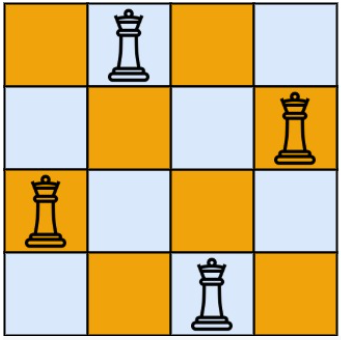

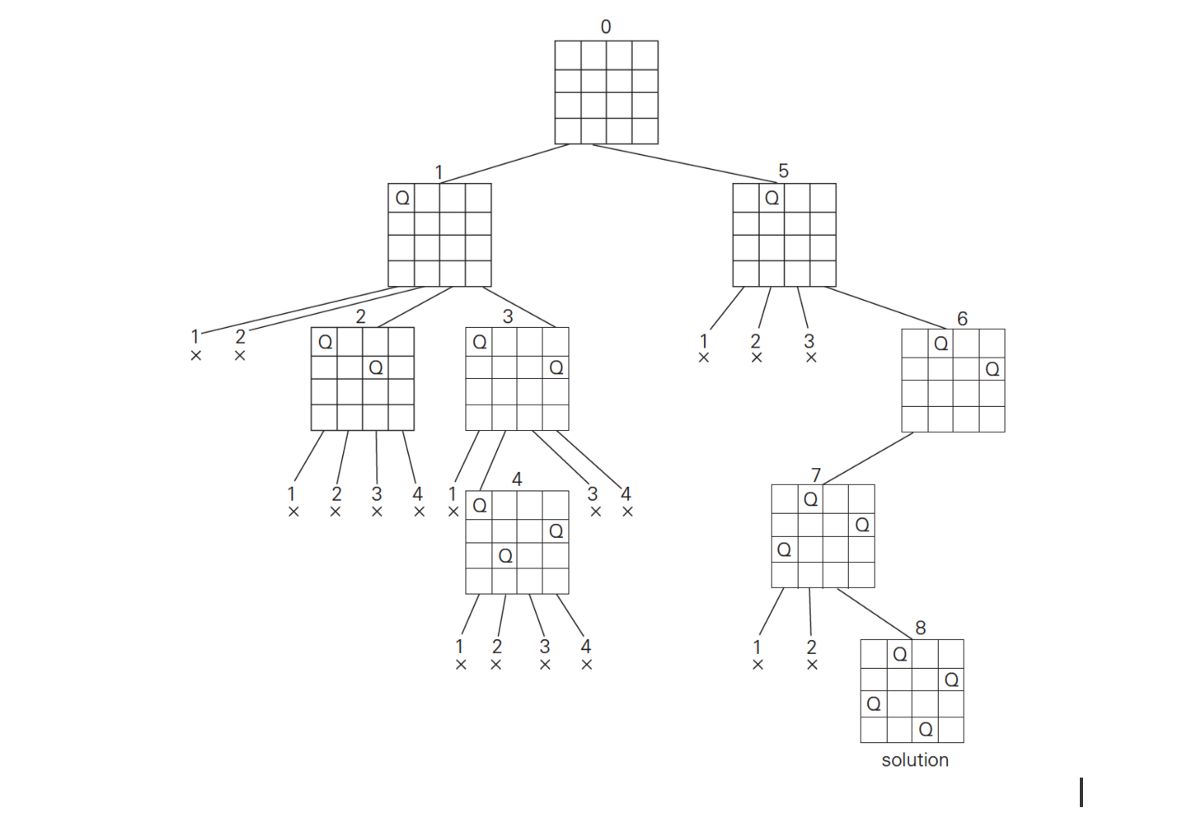

For implemetation details see [here](https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/)